<a href="https://colab.research.google.com/github/johaniie94/Telco_customer_churn/blob/main/Telco_Customer_Churn_040722.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4. Data Preperation
-**How and why did you select the features?** -> We selected all features that could give us valuable information about the reason a customer might cancel their contract. Therefore, we analysed and tested for every single feature if a correlation exists. 

-**Did you derive new features?** -> As some of the services provided by Telco can be seen as one service area ( e.g. Phone, Internet,..) we combined some of them when building the visualizations. Never the less, we still looked at each service seperately to find single correlations. 

-**How did you deal with missing data?** ->To be able to use the following models, we removed the missing data from the data set. To remove the missing values (found in Customer IDs) , we used #telco_data.dropna(inplace = True).

**-How and why did you transform the data?** -> We had to transform the strings into integers so that we could continue building and using the machine learning models. Therefore, we used XXX to achieve this. 

-How did you split the data?


Telco Customer Churn

Group 10
Shoha Comet
Philip Wawra
Sarah Kirchner
Nina Rodriguez

# Data Visualization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')



# Any results you write to the current directory are saved as output.
#Numpy is a package for computing inside of python. I is a library that containg multidimendional array objects and derived objects.

In [2]:
# Declare whether you are on Colab or local
colab = True

In [3]:
if colab==True:
  
  #Mount drive
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#set path to data in Google Drive
data_path = "/content/drive/MyDrive/Marketing Analytics Project/"
  

In [5]:
telco_data = pd.read_csv(data_path+"WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

In [6]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#Size of dataframe
telco_data.shape

(7043, 21)

In [8]:
#Description of variables in the dataframe
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
telco_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Checking the data types of all the columns
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
# Converting Total Charges to a numerical data type.
#telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
#Removing missing values 
telco_data.dropna(inplace = True)
#Remove customer IDs from the data set
#df2 = telco_data.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
telco_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telco_data['Churn'].replace(to_replace='No',  value=0, inplace=True)


In [20]:
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [21]:
#Let's convert all the categorical variables into dummy variables
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'],errors='coerce')
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [22]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [23]:
df_2 = telco_data.iloc[:,1:]
df_2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [24]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df_2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [25]:
df_dummies.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

In [26]:
df_dummies.isna().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

# Model Building

Decision tree classifier 

In [27]:
#Import libraries
#Managing data
import numpy as np
import pandas as pd
import statsmodels.api as sm

#Visualization
import matplotlib.pyplot as plt

#Preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [28]:
#Split the data in test and train 
X = df_dummies.drop(columns = 'Churn')
y = df_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)


In [29]:
#Apply One-hot encoding to categorical values 
#preprocessor = ColumnTransformer(
                    #[('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    #remainder='passthrough'
               

In [30]:
#Trasnformations with training data with fit_transform()
#X_train_prep = preprocessor.fit_transform(X_train)
#X_test_prep  = preprocessor.transform(X_test)

In [31]:
#from sklearn.compose import ColumnTransformer
#Convert output from ColumnTransformer en df 
#encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
#labels = np.concatenate([numeric_cols, encoded_cat])

In [32]:
#X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
#X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
#X_train_prep.info()

In [33]:
#Model implementation 
model = DecisionTreeClassifier(max_depth=5,criterion='gini',random_state=123)

In [34]:
#train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [35]:
#Model evaluation 
prediction = model.predict(X = X_test,)

print("Confusion Matrix")
print("-------------------")

confusion_matrix(
    y_true    = y_test,
    y_pred    = prediction
)

Confusion Matrix
-------------------


array([[1104,  130],
       [ 262,  262]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


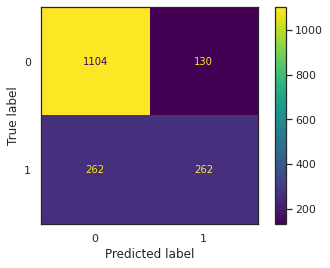

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [37]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = prediction,
            normalize = True
           )
print(f"The accuracy of the model is: {100 * accuracy} %")

The accuracy of the model is: 77.7019340159272 %


Profundidad del árbol: 5
Número de nodos terminales: 31


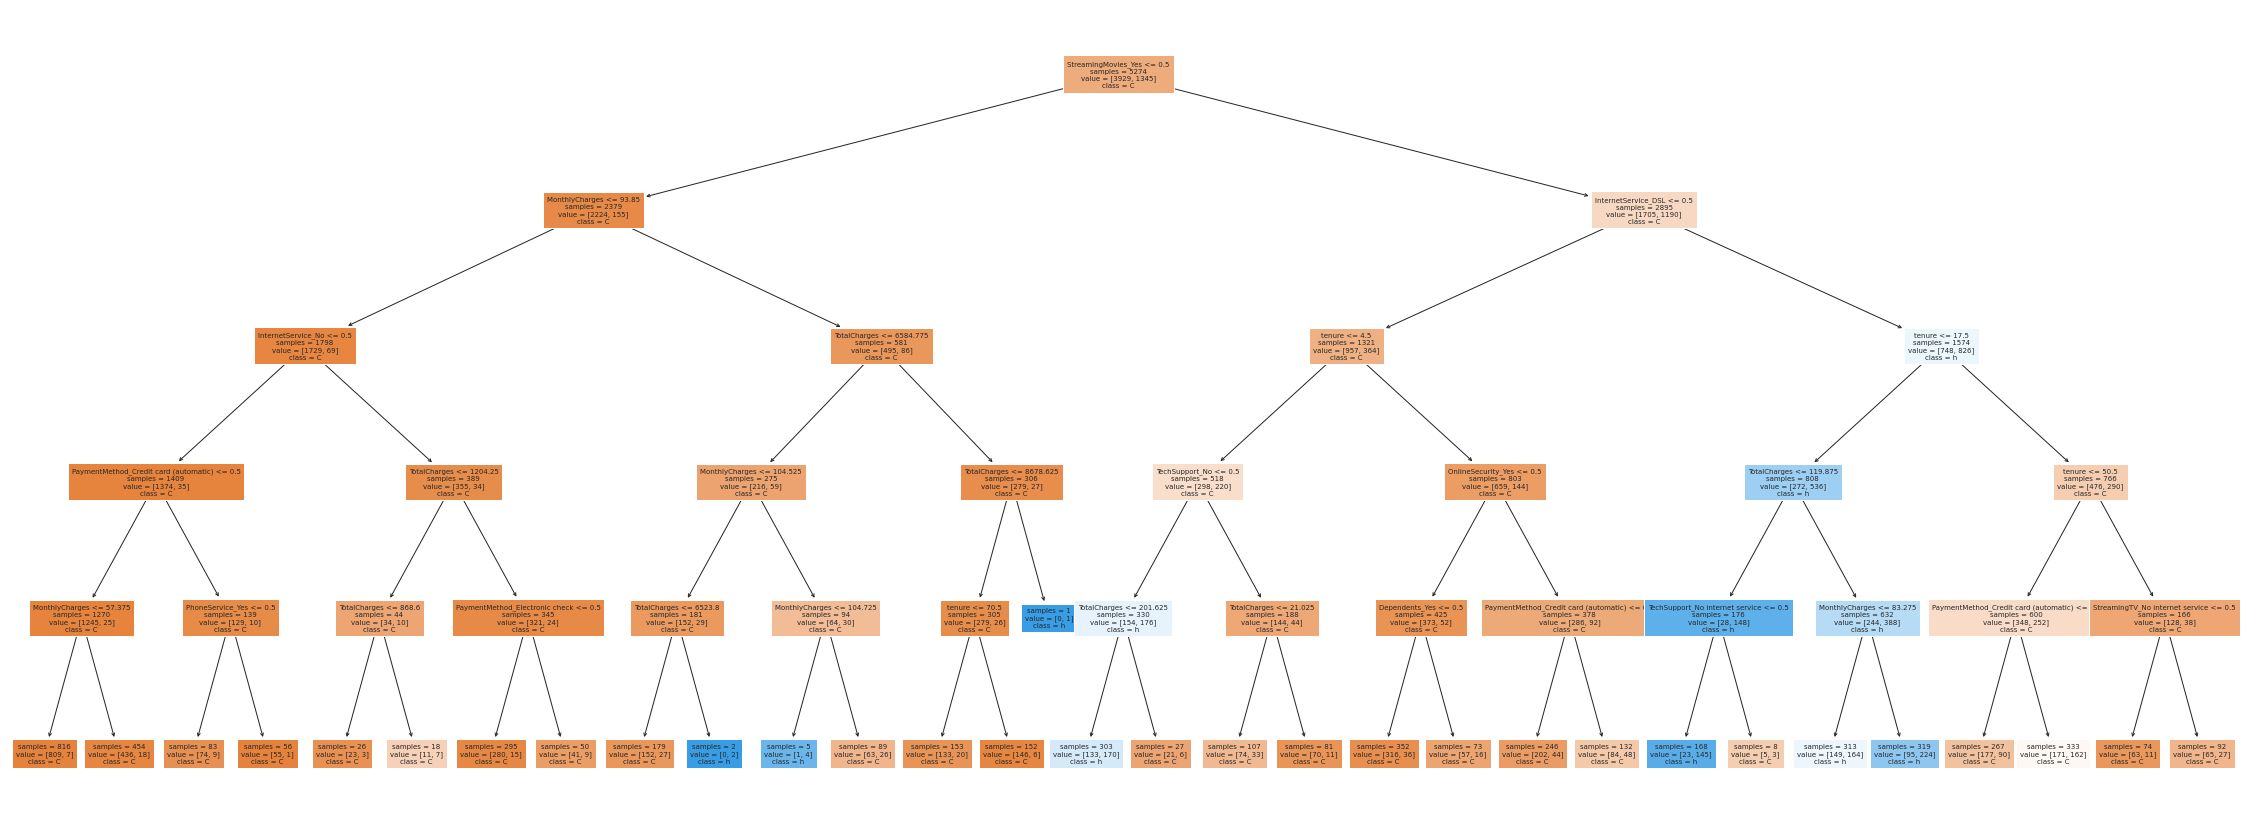

In [38]:
fig, ax = plt.subplots(figsize=(40, 15))

print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            class_names   = 'Churn',
            feature_names = df_dummies.columns.tolist(),
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
 )

In [39]:
importance = model.feature_importances_

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.17906
Feature: 2, Score: 0.04255
Feature: 3, Score: 0.05620
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00263
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00087
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.14206
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00380
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00933
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.03416
Feature: 29, Score: 0.00579
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00274
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

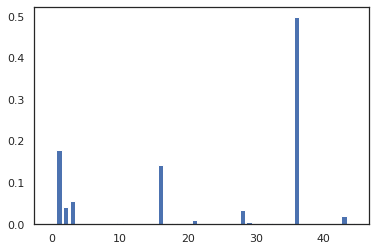

In [40]:
import matplotlib.pyplot as plt
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In the graphic above we can observe the feature importance....

Random forest classifier

In [41]:
#import libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [42]:
df_3 = df_dummies

In [43]:
df_3

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [44]:
#Preparation of the data for the model analysis 
X = df_3.drop(columns = 'Churn')
y = df_3['Churn']

In [45]:
#Divide the training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
X_train = X_train.fillna(X_test.mean())
X_test = X_test.fillna(X_test.mean())

In [47]:
#Feature scaling --> aiming to standarized the dataset with the diferent scale 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
#Model implementation with RandomForestClassifier given our data

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


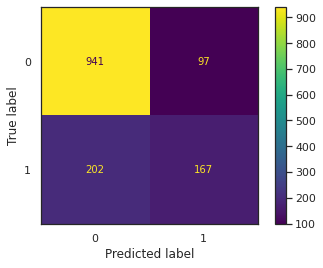

In [49]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [50]:
#Evaluating the model 

print(classification_report(y_test,y_pred))
print("The accuracy of the model is:") 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1038
           1       0.63      0.45      0.53       369

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407

The accuracy of the model is:
0.7874911158493249


In [ ]:
#estimator = classifier.estimators_[5]

# DATA EXPLORATION

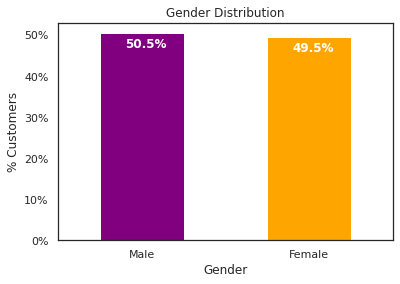

In [ ]:
#Demographics

colors = ['purple','orange']
ax = (telco_data['gender'].value_counts()*100.0 /len(telco_data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

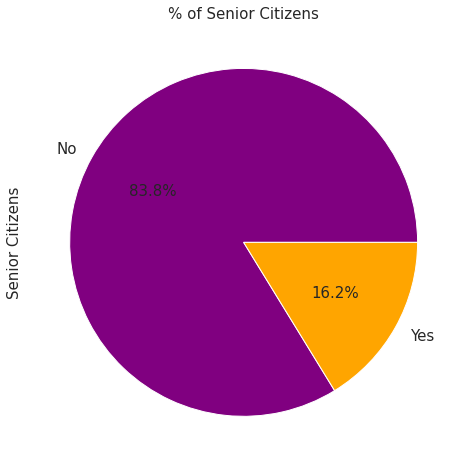

In [ ]:
#Senior Citizens

ax = (telco_data['SeniorCitizen'].value_counts()*100.0 /len(telco_data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,8), fontsize = 15, colors = ['purple','orange'])                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 15)
ax.set_title('% of Senior Citizens', fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

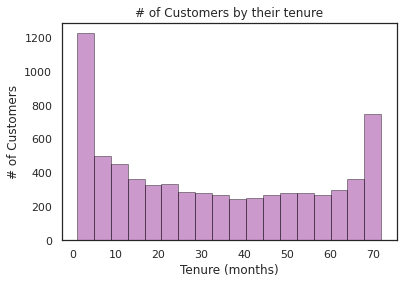

In [ ]:
#Tenure is the Number of months the customer has stayed with the company
#Here we just wanted to figure out how many months are customers keeping their contract with Telco
ax = sns.distplot(telco_data['tenure'], hist=True, kde=False, 
             bins=int(180/10), color = 'purple',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Checking for the duration of contract per customer 

Text(0.5, 1.0, 'Duration of the contract per customer')

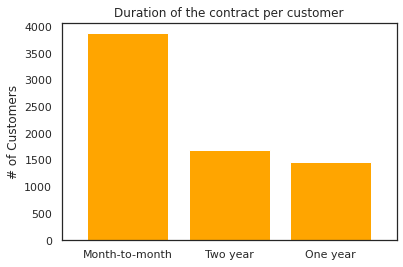

In [ ]:

ax = telco_data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.8, color = 'orange')
ax.set_ylabel('# of Customers')
ax.set_title('Duration of the contract per customer')

#As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

Checking if the gender correlates with the churn 

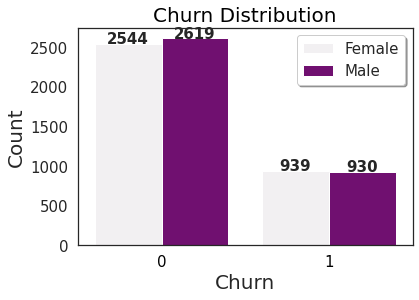

In [ ]:
def countplot(data,x,hue=None,ax=None):
    ax = sns.countplot(data=data, x=x, hue=hue,ax=ax, color = 'purple')
    
    # Looping over each column
    for patch in ax.patches:
        loc = patch.get_x()
        width = patch.get_width()
        height = patch.get_height()
        
        ax.text(loc+width/2, height, str(height), fontsize=15, weight="bold", ha="center")
    plt.draw()
    ax.set_title(f"{x} Distribution", fontsize=20, color="black")
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=15,color="black")
    ax.set_ylabel('Count', fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
    if hue:
        ax.legend(labels=list(data[hue].unique()),prop = {"size":15} ,frameon=True, shadow=True)
def kdeplot(data, col, ax=None):
    ax = sns.kdeplot(data[col][data["Churn"] == 'Yes'], ax=ax, shade=True, color ="purple")
    ax = sns.kdeplot(data[col][data["Churn"] == 'No'], ax=ax, shade=True, color ="orange")
    ax.set_title(f"Distribution of {col} by churn", fontsize=17, color='black')
    plt.draw()
    ax.set_xlabel(col, fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    ax.set_ylabel('Density', fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
    ax.legend(["Churn","Not Churn"], loc='upper right', frameon=True, shadow=True);
def pieplot(x, labels=None,shadow=False,title_p=None):
    ax = plt.pie(x=x, labels=labels, shadow= shadow,autopct='%1.2f%%',textprops={'fontsize': 14})
    plt.title(f"{title_p}", fontsize=15, color="black")
    plt.legend()
def plot_sunburst(col):
    fig = px.sunburst(churn,path=[col,'Churn'],names=col)
    fig.update_layout(height=350, width=500, title_text=f'Percent of Churn by {col}')
    fig.update_traces(textinfo="label+percent parent", textfont_size=16)
    fig.show()
countplot(telco_data,"Churn",hue="gender")

Phone Service and churn possibility

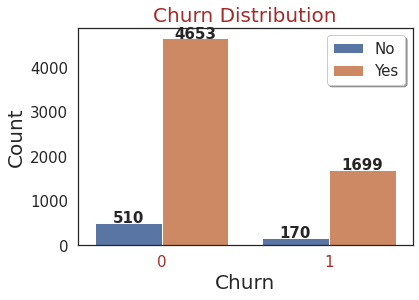

In [ ]:
def countplot(data,x,hue=None,ax=None):
    ax = sns.countplot(data=data, x=x, hue=hue,ax=ax)
    
    # Looping over each column
    for patch in ax.patches:
        loc = patch.get_x()
        width = patch.get_width()
        height = patch.get_height()
        
        ax.text(loc+width/2, height, str(height), fontsize=15, weight="bold", ha="center")
    plt.draw()
    ax.set_title(f"{x} Distribution", fontsize=20, color="brown")
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=15,color="brown")
    ax.set_ylabel('Count', fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
    if hue:
        ax.legend(labels=list(data[hue].unique()),prop = {"size":15} ,frameon=True, shadow=True)
def kdeplot(data, col, ax=None):
    ax = sns.kdeplot(data[col][data["Churn"] == 'Yes'], color="Purple", ax=ax, shade=True)
    ax = sns.kdeplot(data[col][data["Churn"] == 'No'], color="Green", ax=ax, shade=True)
    ax.set_title(f"Distribution of {col} by churn", fontsize=17, color='brown')
    plt.draw()
    ax.set_xlabel(col, fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    ax.set_ylabel('Density', fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
    ax.legend(["Churn","Not Churn"], loc='upper right', frameon=True, shadow=True);
def pieplot(x, labels=None,shadow=False,title_p=None):
    ax = plt.pie(x=x, labels=labels, shadow= shadow,autopct='%1.2f%%',textprops={'fontsize': 14})
    plt.title(f"{title_p}", fontsize=15, color="brown")
    plt.legend()
def plot_sunburst(col):
    fig = px.sunburst(churn,path=[col,'Churn'],names=col)
    fig.update_layout(height=350, width=500, title_text=f'Percent of Churn by {col}')
    fig.update_traces(textinfo="label+percent parent", textfont_size=16)
    fig.show()
countplot(telco_data,"Churn",hue="PhoneService")

#1699 people had the phone service and churned and 4662 have the phone service and did not churn
#512 people do not have the phone service and therefore they did not churn and 170 people do not have the phone service but still churn 

In [ ]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

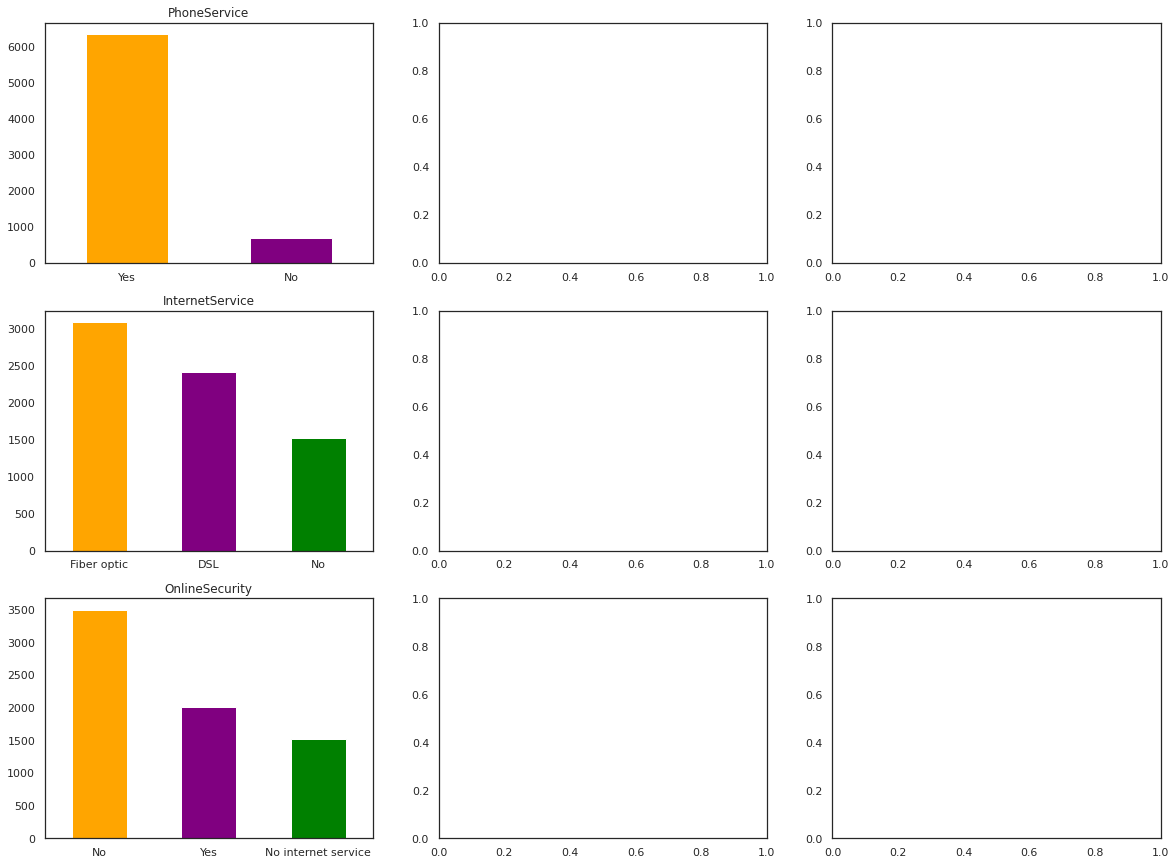

In [ ]:
services = ['PhoneService','InternetService','OnlineSecurity']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (20,15))
for i, item in enumerate(services):
    if i < 3:
        ax = telco_data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color = ['orange', 'purple', 'green'])
        
    elif i >3 and i < 3:
        ax = telco_data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0, color = ['orange', 'purple', 'green'])
        
    elif i < 3:
        ax = telco_data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color = ['orange', 'purple', 'green'])
    ax.set_title(item)

Churn per contract type

Customers tend to churn month per month contracts and most of the customers choose a two year contract

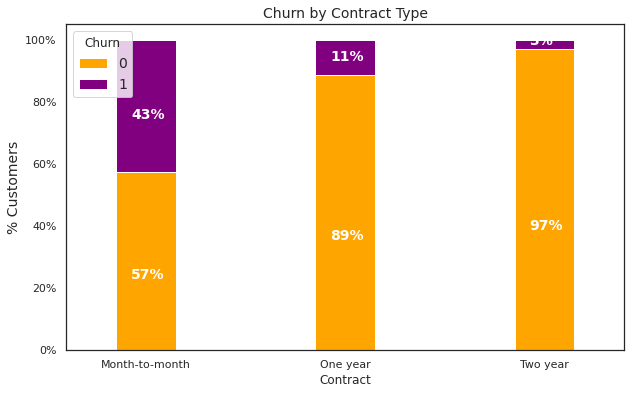

In [ ]:
colors = ['orange','purple']
contract_churn = telco_data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


Seniority level

most of the not senior citizens decide to stay with their contracts
almost half of the senior citizens are churning

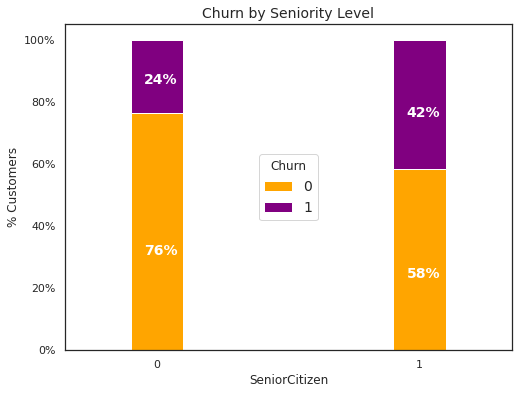

In [ ]:
colors = ['orange','purple']
seniority_churn = telco_data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)
    #How to change the 0 and 1 to yes and no?

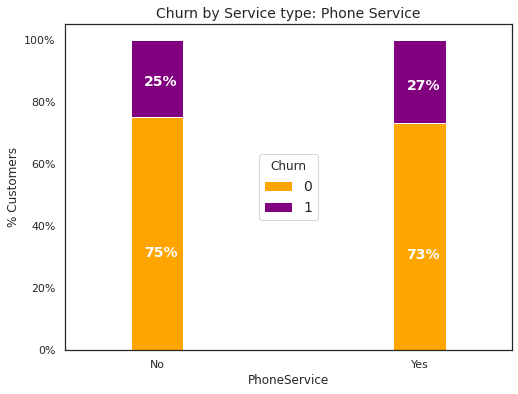

In [ ]:
colors = ['orange','purple']
phoneservice_churn = telco_data.groupby(['PhoneService','Churn']).size().unstack()

ax = (phoneservice_churn.T*100.0 / phoneservice_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Service type: Phone Service',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)
    
    #No correlation between churning and the phone service 

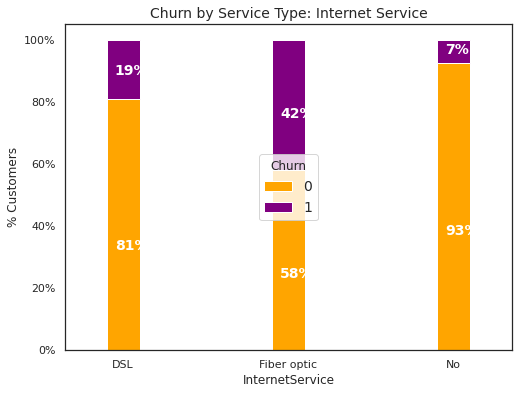

In [ ]:
colors = ['orange','purple']
internetservice_churn = telco_data.groupby(['InternetService','Churn']).size().unstack()

ax = (internetservice_churn.T*100.0 / internetservice_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Service Type: Internet Service',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)
    
    #People with fiber optic tend to churn more than people with the DSL 

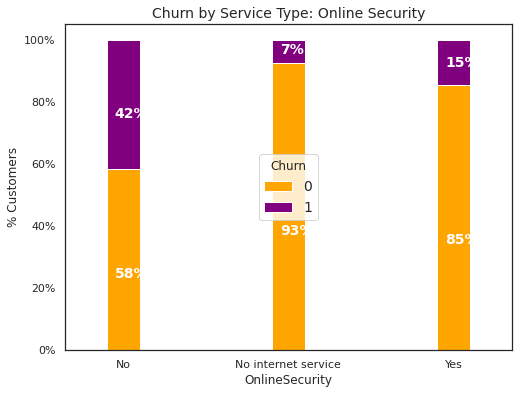

In [ ]:
colors = ['orange','purple']
onlinesecurity_churn = telco_data.groupby(['OnlineSecurity','Churn']).size().unstack()

ax = (onlinesecurity_churn.T*100.0 / onlinesecurity_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Service Type: Online Security',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)
    
    #People who dont have the online security service tend to churn more than people who have the service

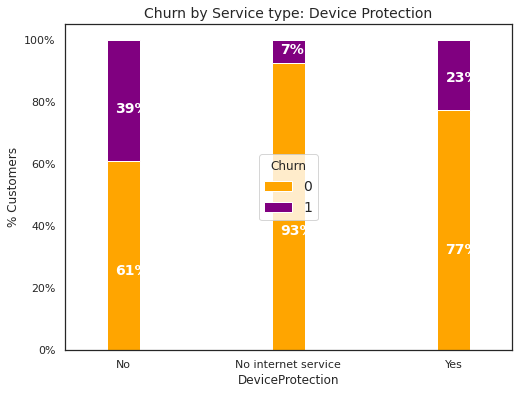

In [ ]:
colors = ['orange','purple']
phoneservice_churn = telco_data.groupby(['DeviceProtection','Churn']).size().unstack()

ax = (phoneservice_churn.T*100.0 / phoneservice_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Service type: Device Protection',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)
  #People who have No Device Protection have churned up to 39% 
  #93% people with no internet service have stayed with the company

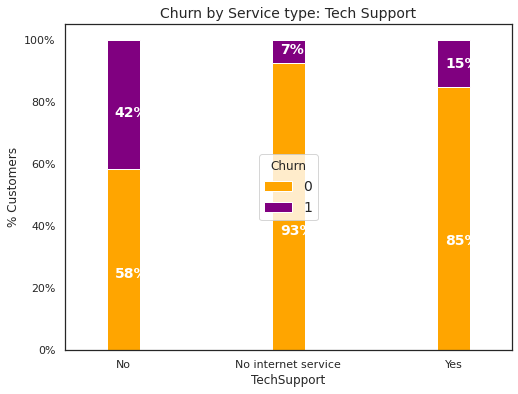

In [ ]:
colors = ['orange','purple']
phoneservice_churn = telco_data.groupby(['TechSupport','Churn']).size().unstack()

ax = (phoneservice_churn.T*100.0 / phoneservice_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Service type: Tech Support',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)
    #93% people with no internet service have stayed with the company
    #people with no Tech Support leave more than with having a Tech Supoort

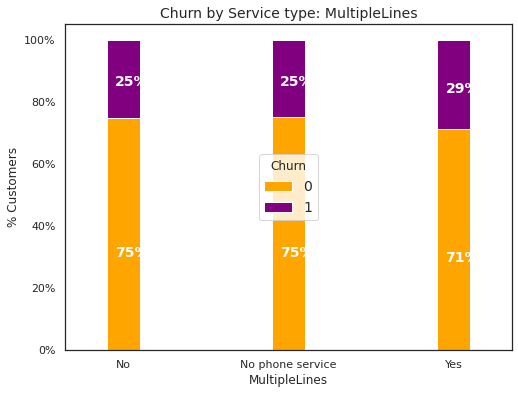

In [ ]:
colors = ['orange','purple']
MultipleLines_churn = telco_data.groupby(['MultipleLines','Churn']).size().unstack()

ax = (MultipleLines_churn.T*100.0 / MultipleLines_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Service type: MultipleLines',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)
    #no correlation

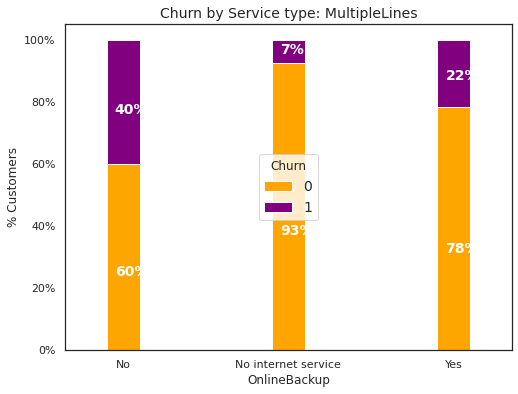

In [ ]:
colors = ['orange','purple']
OnlineBackup_churn = telco_data.groupby(['OnlineBackup','Churn']).size().unstack()

ax = (OnlineBackup_churn.T*100.0 / OnlineBackup_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Service type: MultipleLines',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)
    #correlation because when no OnlineBackup they will be twice as likely to churn the service 

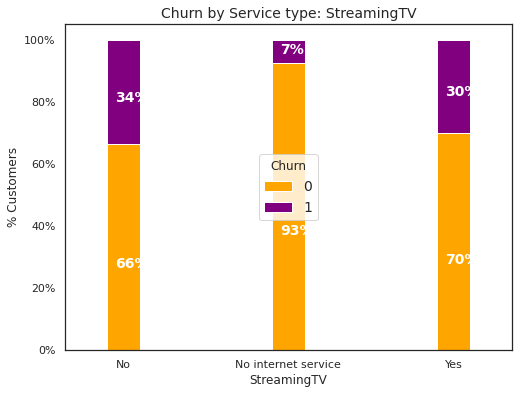

In [ ]:
colors = ['orange','purple']
StreamingTV_churn = telco_data.groupby(['StreamingTV','Churn']).size().unstack()

ax = (StreamingTV_churn.T*100.0 / StreamingTV_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Service type: StreamingTV',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)
    #correlation because when no OnlineBackup they will be twice as likely to churn the service 

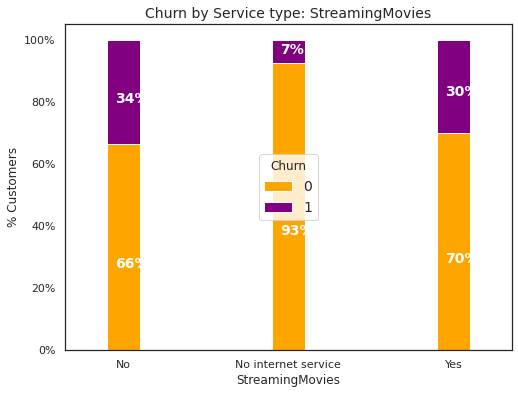

In [ ]:
colors = ['orange','purple']
StreamingMovies_churn = telco_data.groupby(['StreamingMovies','Churn']).size().unstack()

ax = (StreamingMovies_churn.T*100.0 / StreamingMovies_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Service type: StreamingMovies',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)
    #correlation because when no OnlineBackup they will be twice as likely to churn the service 

Random Forests

other models:
KNN